<IPython.core.display.Javascript object>


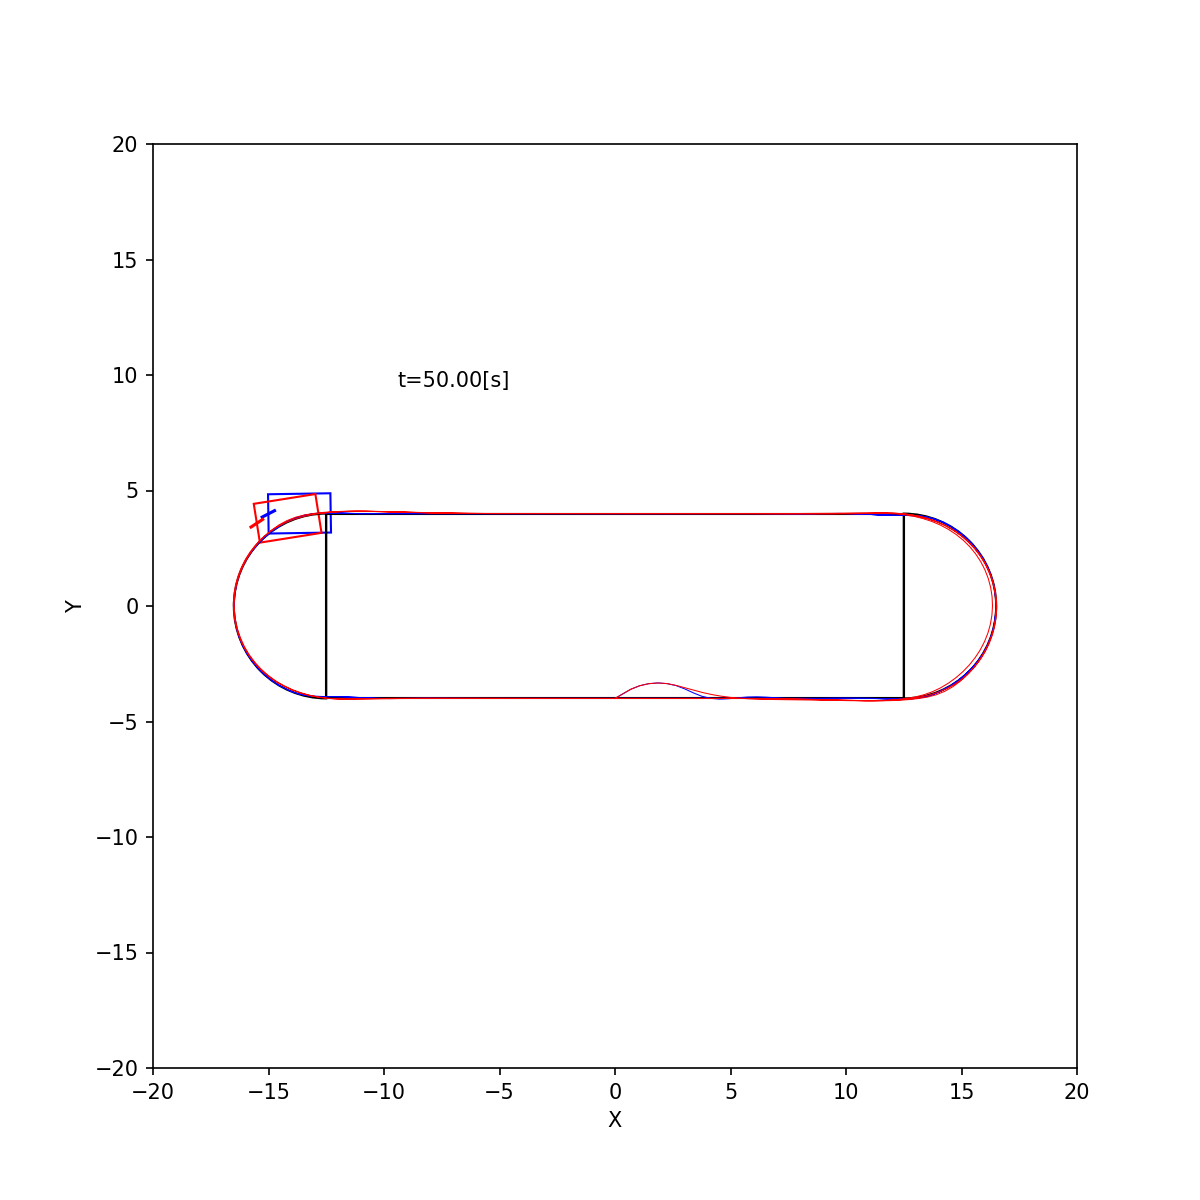

In [4]:
import numpy as np
import matplotlib
matplotlib.use('nbagg')
import matplotlib.animation as anm
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import copy
import kal_python as kal

Q = np.diag([10.0, 1.0])
R = np.diag([10.0])


if __name__ == '__main__':
    c = kal.course.course(4,25)
    x_start=np.array([0,-c.R,np.pi/6])
    pid_car = kal.vehicle_kinematics.agent_for_PID(np.array([4.0,np.pi/6]),copy.copy(c))
    mpc_car = kal.mpc.agent_for_MPC(np.array([4.0,np.pi/6]),40,Q,R,copy.copy(c))
    
    z = kal.vehicle_kinematics.vehicle(x_start,1.7,2.7,"blue",pid_car,c)
    z2 = kal.vehicle_kinematics.vehicle(x_start,1.7,2.7,"red",mpc_car,c)
    
    world=kal.world.World(50,0.1)
    world.append(z)
    world.append(z2)
    world.append(c)
    world.draw()
    
